In [12]:
import torch
import torchvision
from torchvision import models
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms
from google.colab.patches import cv2_imshow

In [2]:
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 125MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'
img = Image.open('000000037777.jpg')

--2025-03-29 07:22:50--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.6.141, 16.182.102.73, 52.216.250.204, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.6.141|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg’

000000037777.jpg    100%[===================>]  39.88K  --.-KB/s    in 0.05s   

2025-03-29 07:22:50 (797 KB/s) - ‘000000037777.jpg’ saved [40833/40833]



In [4]:
transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(img)

In [5]:
img_tensor = img_tensor.unsqueeze(0)

In [6]:
with torch.no_grad():
    outputs = model(img_tensor)

In [7]:
scores = outputs[0]['scores'].detach().numpy()
class_labels = outputs[0]['labels'].detach().numpy()
boxes = outputs[0]['boxes'].detach().numpy()

In [14]:
img_cv = cv2.imread('000000037777.jpg')
for i in range(len(scores)):
    if scores[i] > 0.5:
        x1, y1, x2, y2 = boxes[i]
        cv2.rectangle(img_cv, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(img_cv, f'{class_labels[i]}', (int(x1), int(y1-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

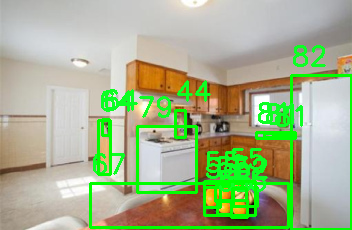

In [15]:
cv2_imshow(img_cv)